<a href="https://colab.research.google.com/github/gabrielbchacon/my_data_portfolio/blob/main/Previs%C3%A3o_area_queimada_em_incendios_florestais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Technical Approach
- **Data Import & Preparation:** Utilized `ucimlrepo` library for data import and performed initial data cleaning including One-Hot Encoding for categorical variables (months and days).
- **Exploratory Data Analysis:** Conducted using histograms, boxplots, correlation matrices, and scatter plots to understand data distribution and relationships.
- **Modeling:** Applied a variety of machine learning and deep learning models including Linear Regression, Decision Trees, SVM, and Neural Networks. Models were evaluated based on Root Mean Squared Error (RMSE).

#### Key Insights
- **Data Transformation:** Normalization and encoding significantly influenced the modeling accuracy.
- **Model Diversity:** Exploring different models highlighted the varying effectiveness in predicting the burned area, guiding the selection of the most appropriate models.
- **Exploratory Analysis:** Crucial for making informed modeling decisions, particularly in variable selection and outlier detection.

#### Conclusion
This project underscores the importance of meticulous data preparation and the strategic use of diverse modeling techniques to predict areas affected by forest fires. The results and methodologies discussed could serve as a reference for similar predictive modeling challenges.

# Previsão da Área Queimada em Incêndios Florestais

Este notebook tem como objetivo desenvolver modelos preditivos para estimar a área queimada por incêndios florestais na região nordeste de Portugal usando dados meteorológicos e geográficos.

## Etapas do Projeto
1. Instalação de Bibliotecas
2. Importação dos Dados
3. Preparação dos Dados
4. Análise Exploratória de Dados (EDA)
5. Modelagem
6. Avaliação dos Modelos
7. Conclusões


## 1. Instalação de Bibliotecas

In [ ]:
import pandas as pd
import polars as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense



## 2. Importação dos Dados
fonte: https://archive.ics.uci.edu/dataset/162/forest+fires
- Instalação da biblioteca ucimlrepo para facilitar a importação de conjuntos de dados do repositório UCI.
- Importação dos dados do conjunto "Forest Fires", que inclui características como coordenadas espaciais, índices FWI, temperatura, umidade relativa, velocidade do vento e precipitação.


In [ ]:
# Instalação da biblioteca ucimlrepo necessária para importar datasets do UCI Machine Learning Repository
!pip install ucimlrepo

## 3. Preparação dos Dados

- Limpeza inicial dos dados, conversão de variáveis categóricas utilizando One-Hot Encoding para os meses e dias da semana.
- Verificação da ausência de valores nulos após as transformações.



In [ ]:
# fetch dataset
forest_fires = fetch_ucirepo(id=162)

# data (as pandas dataframes)
X = forest_fires.data.features
y = forest_fires.data.targets

# metadata
print(forest_fires.metadata)

# variable information
print(forest_fires.variables)


{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'title': 'A data mining approach to predict forest fires using meteorological data', 'authors': 'P. Cortez, A

In [ ]:
# Exibir informações básicas sobre o dataset
print(X.info())
print(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB
None
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192 

In [ ]:
# Conversão de variáveis categóricas usando One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(X[['month', 'day']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Remover colunas originais 'month' e 'day' e adicionar as colunas codificadas
X = X.drop(['month', 'day'], axis=1)
X = pd.concat([X, encoded_features_df], axis=1)

# Verificar se ainda existem valores ausentes
print(X.isnull().sum())

X            0
Y            0
FFMC         0
DMC          0
DC           0
ISI          0
temp         0
RH           0
wind         0
rain         0
month_apr    0
month_aug    0
month_dec    0
month_feb    0
month_jan    0
month_jul    0
month_jun    0
month_mar    0
month_may    0
month_nov    0
month_oct    0
month_sep    0
day_fri      0
day_mon      0
day_sat      0
day_sun      0
day_thu      0
day_tue      0
day_wed      0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data = pd.concat([X, y], axis=1)

# Visualizar os primeiros registros do conjunto de treinamento para confirmar as modificações
print(X_train.head())

     X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  month_nov  \
329  4  3  92.2  102.3  751.5   8.4  23.5  27   4.0   0.0  ...        0.0   
173  4  4  90.9  126.5  686.5   7.0  17.7  39   2.2   0.0  ...        0.0   
272  2  5  92.1  152.6  658.2  14.3  20.2  47   4.0   0.0  ...        0.0   
497  3  4  96.1  181.1  671.2  14.3  32.3  27   2.2   0.0  ...        0.0   
182  5  4  86.8   15.6   48.3   3.9  12.4  53   2.2   0.0  ...        0.0   

     month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  \
329        0.0        1.0      0.0      0.0      1.0      0.0      0.0   
173        0.0        1.0      0.0      1.0      0.0      0.0      0.0   
272        0.0        0.0      0.0      0.0      0.0      0.0      0.0   
497        0.0        0.0      0.0      0.0      0.0      0.0      0.0   
182        0.0        0.0      0.0      0.0      0.0      1.0      0.0   

     day_tue  day_wed  
329      0.0      0.0  
173      0.0      0.0  
272      1.0      0.

## 4. Análise Exploratória de Dados (EDA)
- Geração de histogramas para entender a distribuição das variáveis numéricas.
- Criação de boxplots para detectar outliers e avaliar a distribuição dos dados.
- Construção de uma matriz de correlação para identificar relações potenciais entre as variáveis.
- Realização de gráficos de dispersão para visualizar as relações entre cada variável e a área queimada.



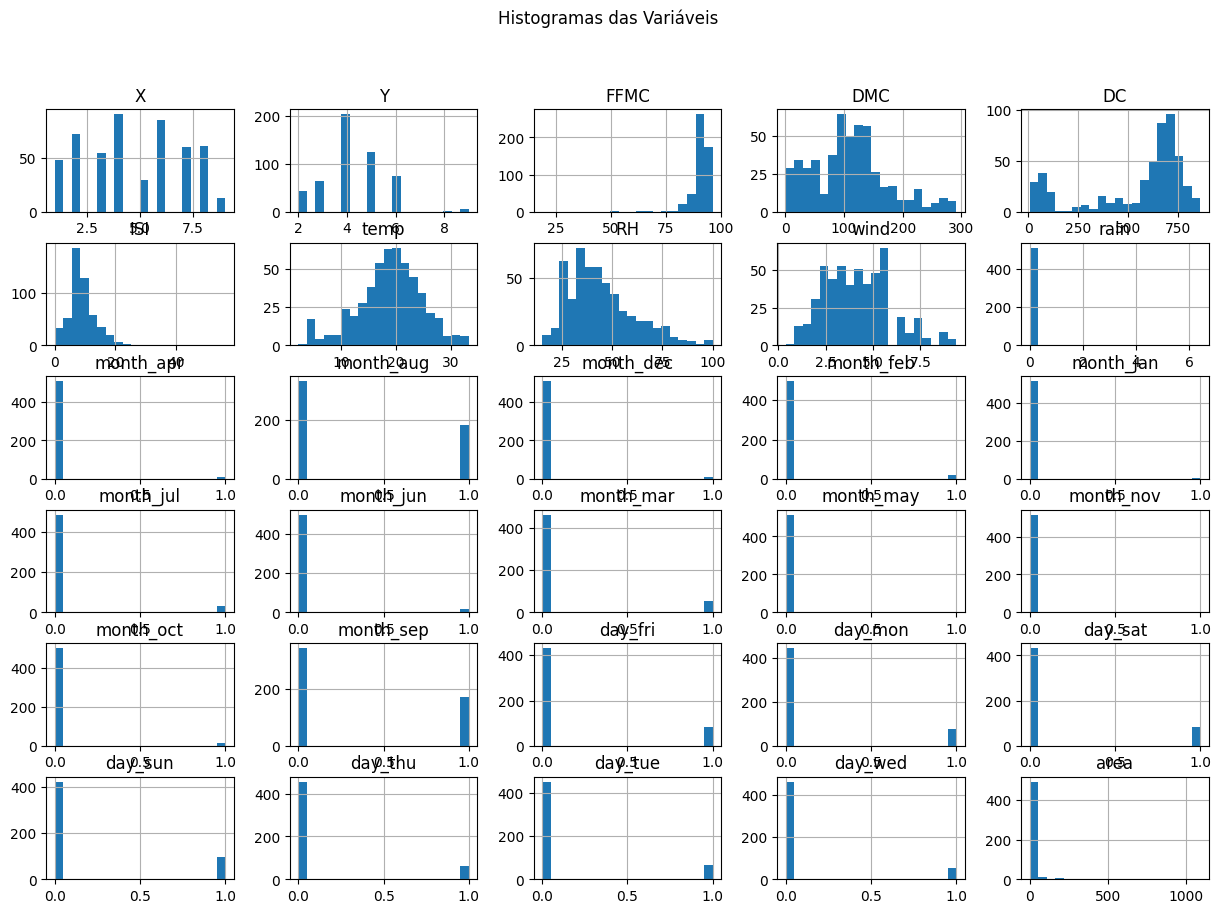

In [ ]:
# Histogramas para todas as variáveis numéricas
data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramas das Variáveis')
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

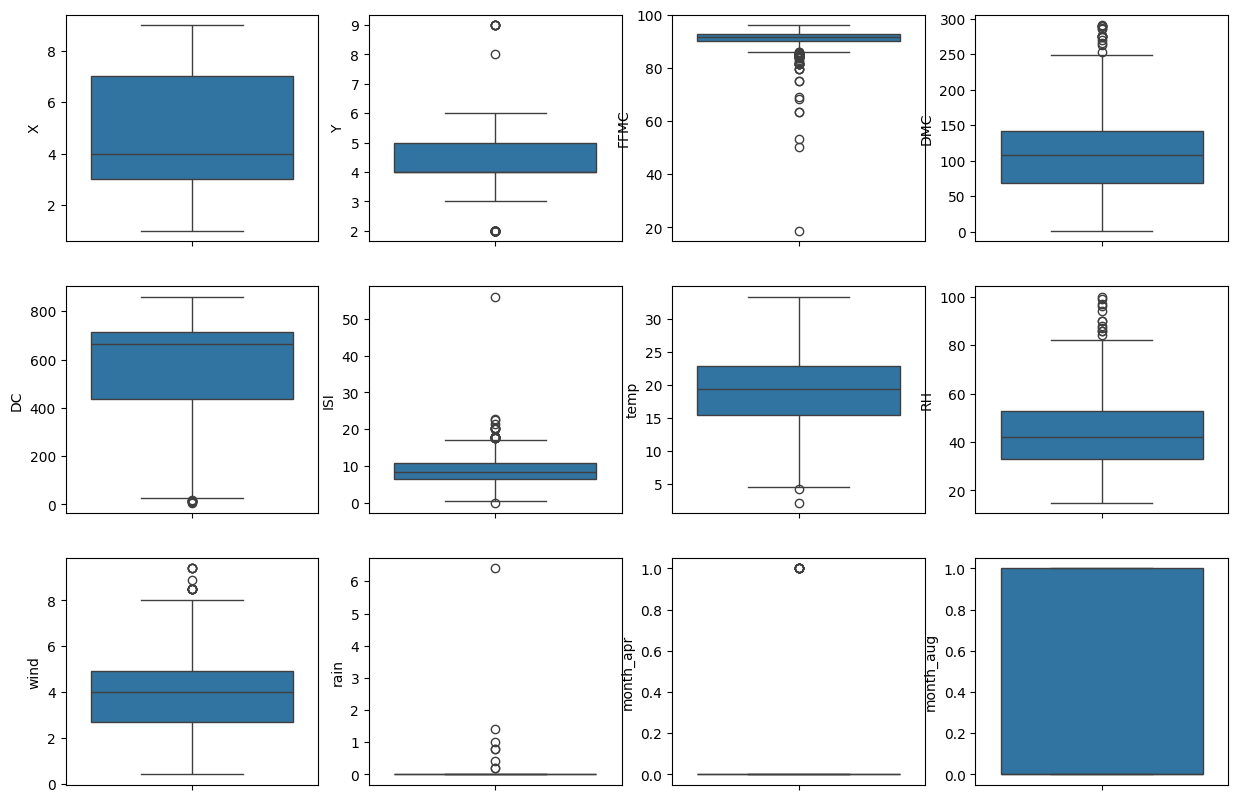

In [ ]:
# Boxplots para analisar outliers e distribuição
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(data.columns[:-1]):  # Exclui a coluna 'area'
    sns.boxplot(data[feature], ax=axes[idx // 4, idx % 4])
plt.tight_layout()
plt.suptitle('Boxplots das Variáveis')
plt.show()

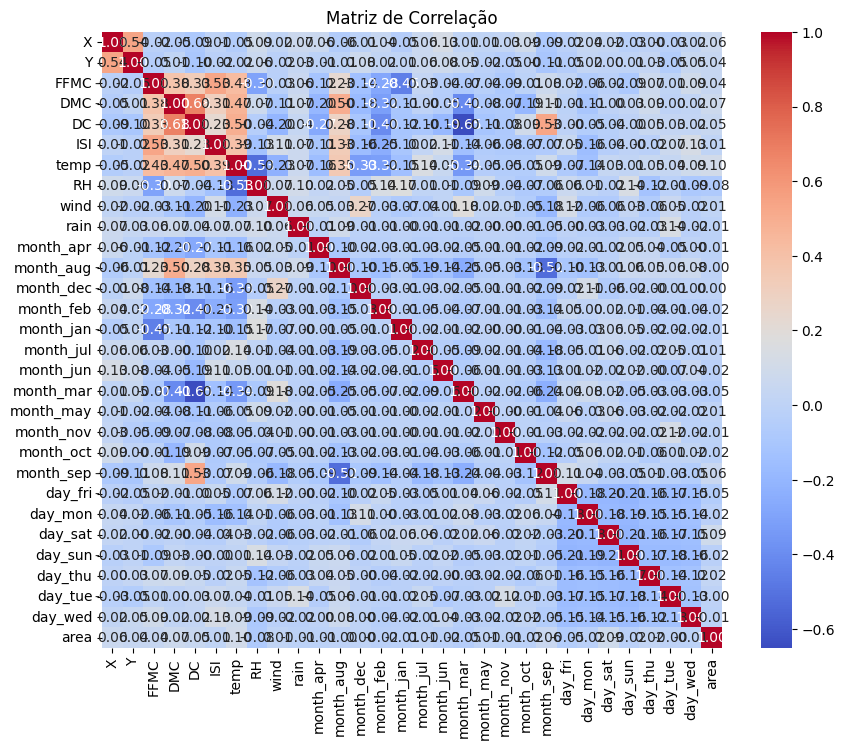

In [ ]:
# Matriz de correlação
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

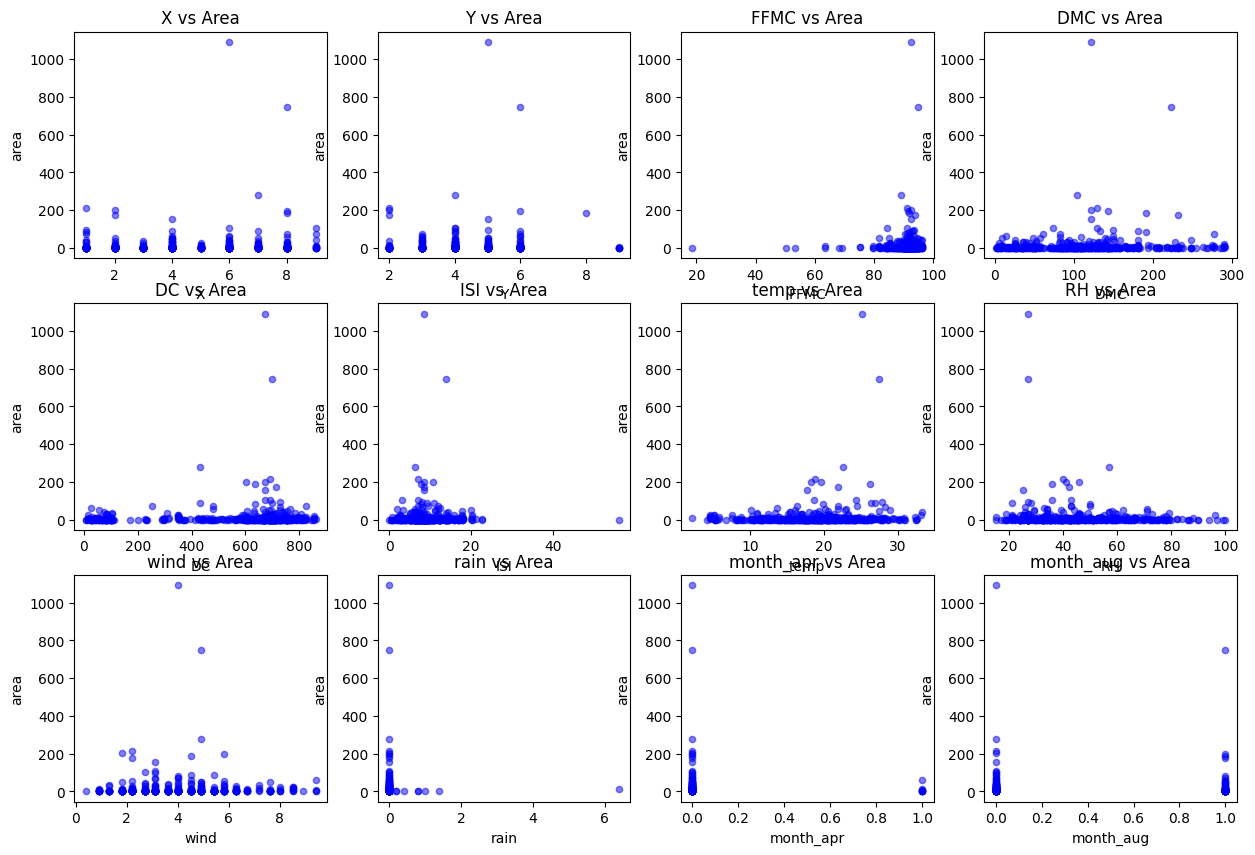

In [ ]:
# Scatter plots para visualizar relações entre as variáveis e a área queimada
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(data.columns[:-1]):  # Exclui a coluna 'area'
    data.plot(kind='scatter', x=feature, y='area', alpha=0.5, color='blue', ax=axes[idx // 4, idx % 4], title=feature + ' vs Area')
plt.tight_layout()
plt.show()

## 5. Modelagem
Normalização dos dados para a preparação para modelagem.
Aplicação de diversos modelos de machine learning e deep learning, incluindo:
- Modelos lineares (Regressão Linear, Ridge, Lasso)
- Modelos baseados em árvores (Decision Tree, Random Forest, Gradient Boosting)
- Modelos de machine learning avançados (SVM)
- Redes neurais (Feedforward, RNN, GRU)


Cada modelo foi treinado e avaliado usando o RMSE (Root Mean Squared Error) para comparar a eficácia entre eles.

In [ ]:
# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)


# Dividir dados em treino e teste
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]


In [ ]:
# Converter um array de valores em uma matriz de conjuntos de dados
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0:-1]  # Todas as colunas exceto a última
        X.append(a)
        Y.append(dataset[i + look_back, -1])  # Última coluna é o alvo
    return np.array(X), np.array(Y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input para [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[2]))

# Criar e treinar o modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(1, X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
411/411 - 2s - loss: 0.0036 - 2s/epoch - 6ms/step
Epoch 2/100
411/411 - 1s - loss: 0.0032 - 521ms/epoch - 1ms/step
Epoch 3/100
411/411 - 1s - loss: 0.0033 - 516ms/epoch - 1ms/step
Epoch 4/100
411/411 - 1s - loss: 0.0031 - 512ms/epoch - 1ms/step
Epoch 5/100
411/411 - 1s - loss: 0.0030 - 506ms/epoch - 1ms/step
Epoch 6/100
411/411 - 1s - loss: 0.0030 - 514ms/epoch - 1ms/step
Epoch 7/100
411/411 - 1s - loss: 0.0029 - 502ms/epoch - 1ms/step
Epoch 8/100
411/411 - 1s - loss: 0.0029 - 502ms/epoch - 1ms/step
Epoch 9/100
411/411 - 1s - loss: 0.0028 - 505ms/epoch - 1ms/step
Epoch 10/100
411/411 - 1s - loss: 0.0027 - 505ms/epoch - 1ms/step
Epoch 11/100
411/411 - 0s - loss: 0.0027 - 498ms/epoch - 1ms/step
Epoch 12/100
411/411 - 1s - loss: 0.0027 - 503ms/epoch - 1ms/step
Epoch 13/100
411/411 - 1s - loss: 0.0026 - 511ms/epoch - 1ms/step
Epoch 14/100
411/411 - 1s - loss: 0.0026 - 513ms/epoch - 1ms/step
Epoch 15/100
411/411 - 1s - loss: 0.0026 - 505ms/epoch - 1ms/step
Epoch 16/100
411/411 -

In [ ]:
# Previsão e cálculo do desempenho
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverter normalização para cálculo de erro original
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Cálculo de RMSE
train_score = np.sqrt(np.mean((y_train - train_predict[:,0])**2))
test_score = np.sqrt(np.mean((y_test - test_predict[:,0])**2))
print('Train Score: {:.2f} RMSE'.format(train_score))
print('Test Score: {:.2f} RMSE'.format(test_score))

4/4 [==============================] - 0s 2ms/step
Train Score: 0.02 RMSE
Test Score: 0.08 RMSE


Testando outros modelos


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma instância do modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Calcular o RMSE para o treinamento e o teste
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

Train RMSE: 0.04
Test RMSE: 0.10


In [ ]:
from sklearn.linear_model import Ridge, Lasso


# Criar e treinar o modelo Ridge
ridge_model = Ridge(alpha=1.0)  # Alpha é o parâmetro de regularização, experimente diferentes valores
ridge_model.fit(X_train, y_train)

# Criar e treinar o modelo Lasso
lasso_model = Lasso(alpha=0.1)  # Alpha pode precisar ser ajustado para evitar a subestimação excessiva
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
#Fazer previsões com Ridge
y_pred_ridge_train = ridge_model.predict(X_train)
y_pred_ridge_test = ridge_model.predict(X_test)

# Fazer previsões com Lasso
y_pred_lasso_train = lasso_model.predict(X_train)
y_pred_lasso_test = lasso_model.predict(X_test)

# Calcular o RMSE para o treinamento e o teste de cada modelo
rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

print(f"Ridge Train RMSE: {rmse_ridge_train:.2f}")
print(f"Ridge Test RMSE: {rmse_ridge_test:.2f}")
print(f"Lasso Train RMSE: {rmse_lasso_train:.2f}")
print(f"Lasso Test RMSE: {rmse_lasso_test:.2f}")

Ridge Train RMSE: 0.04
Ridge Test RMSE: 0.10
Lasso Train RMSE: 0.04
Lasso Test RMSE: 0.10


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Árvore de Decisão
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

print(f"Decision Tree RMSE: {dt_rmse:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")


<ipython-input-76-5bc5bed88e5b>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Decision Tree RMSE: 0.11
Random Forest RMSE: 0.10


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# GBM
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)
gbm_rmse = mean_squared_error(y_test, gbm_predictions, squared=False)

print(f"Gradient Boosting RMSE: {gbm_rmse:.2f}")

Gradient Boosting RMSE: 0.10


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.svm import SVR

# SVM para Regressão
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)

print(f"SVM Regression RMSE: {svm_rmse:.2f}")

SVM Regression RMSE: 0.11


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import numpy as np

# Modelo Feedforward
model_ff = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

model_ff.compile(optimizer='adam', loss='mse')
model_ff.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Previsão e avaliação
ff_predictions = model_ff.predict(X_test)
ff_rmse = np.sqrt(mean_squared_error(y_test, ff_predictions))

print(f"Feedforward Neural Network RMSE: {ff_rmse:.2f}")

Epoch 1/100
11/11 [==============================] - 1s 13ms/step - loss: 0.0152 - val_loss: 0.0043
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 10/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 11

In [ ]:
from tensorflow.keras.layers import SimpleRNN

# Adaptar os dados para RNN
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Modelo RNN
model_rnn = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train_rnn, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Previsão e avaliação
rnn_predictions = model_rnn.predict(X_test_rnn)
rnn_rmse = np.sqrt(mean_squared_error(y_test, rnn_predictions))

print(f"Recurrent Neural Network RMSE: {rnn_rmse:.2f}")

Epoch 1/100
11/11 [==============================] - 1s 20ms/step - loss: 0.0893 - val_loss: 0.0289
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0267 - val_loss: 0.0264
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0199 - val_loss: 0.0136
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.0090
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0080 - val_loss: 0.0069
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 0.0044
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0030
Epoch 11

In [ ]:
from tensorflow.keras.layers import GRU

# Modelo GRU
model_gru = Sequential([
    GRU(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1)
])

model_gru.compile(optimizer='adam', loss='mse')
model_gru.fit(X_train_rnn, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Previsão e avaliação
gru_predictions = model_gru.predict(X_test_rnn)
gru_rmse = np.sqrt(mean_squared_error(y_test, gru_predictions))

print(f"Gated Recurrent Unit RMSE: {gru_rmse:.2f}")

Epoch 1/100
11/11 [==============================] - 1s 23ms/step - loss: 0.0044 - val_loss: 0.0023
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 9.6574e-04
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 9.6703e-04
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 9.4708e-04
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 9.3736e-04
Epoch 8/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 9.0031e-04
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 8.8663e-04
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0020 - v

## 6. Avaliação dos Modelos


### Resultados

- Os modelos exibiram variados graus de eficácia, com o RMSE servindo como métrica principal para julgar o desempenho.
- A comparação entre modelos foi crucial para identificar qual abordagem é mais promissora para a previsão de áreas queimadas em incêndios florestais.